## Numpy1 : 넘파이 배열 객체 다루기
### 1.넘파이 배열과 텐서
넘파이 배열(ndarray)은 기존 파이썬의 리스트와 같이 넘파이에서 텐서 데이터를 다루는 객체이다. 텐서(tensor)란 선형대수에서 사용하는 데이터 배열을 지칭하는 용어로, 데이터 배열의 랭크(rank)에 따라 별도의 용어가 존재한다.
| 랭크 | 이름 | 예 |
| --- | --- | ---|
|0| 스칼라(scaler)| 7|
|1| 벡터(vector) | [1,2] |
|2| 행렬(matrix) | [[1,2,],[3,4]] |
|3| 3차원 텐서(3-order tensor) | [[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]] |
|n| n차원 텐서(n-order tensor) |  

In [1]:
import numpy as np

---

### 2.배열의 메모리 구조
넘파이를 사용하여 배열을 생성하는 기법은 매우 다양하지만 np.array 함수가 가장 기초적이며 많이 쓰인다.

In [2]:
## np.array(배열 정보, 데이터 타입)
## 배열 데이터는 다양한 형태로 표현이 가능하지만 기본적으로 파이썬 리스트 형태의 인수를 주로 사용한다.
array1= np.array([1,4,5,8], float)

#### 파이썬 리스트와 넘파이 배열의 차이점
1. 텐서의 구조에 따라 배열 생성 : 파이썬의 리스트와 달리 넘파이 배열은 텐서의 구조에 맞춰 배열을 생성한다. 따라서 m*n 형태의 배열(행렬)을 만들 경우 모든 데이터는 채워져 있어야 한다. 

2. 동적 타이핑(dynamic typing) : 파이썬은 인터프리터 특성상 코드 수행 시점에서 타입을 결정하는 동적 타이핑을 지원하므로 리스트엔 여러 종류의 데이터 타입을 하나의 리스트에 넣을 수 있다. 하지만 넘파이는 동적 타이핑을 지원하지 않고 **하나의 데이터 타입**만 사용할 수 있다.  

3. 데이터 메모리 배열 방식 : 리스트는 각 요소의 값이 메모리상에 연속적으로 배열되는 것이 아니라 해당 값의 메모리 주소만 연속적으로 배열함으로써 다양한 종류의 값이 순서대로 표시되게 만드는 반면 넘파이 배열은 실제 값을 연속적으로 나열하기 때문에 각 값들의 메모리 크기가 동일해야 한다. 값이 연속적으로 배열되기 때문에 검색이나 연산에 있어 리스트에 비해 **훨씬 빠른 속도**로 처리가 가능하다

---

### 3.배열의 생성

In [11]:
test1=np.array([1,4,5,'8'],float)
print(test1)              ##(1)
print(type(test1[3]))     ##(2)
print(test1.shape)        ##(3)

[1. 4. 5. 8.]
<class 'numpy.float64'>
(4,)


**(1)** : test1에서 리스트 안에 정수형과 문자형 모두 존재하지만 실수형으로 선언했다. 그래서 실제로 값을 출력하면 모든 값이 실수형으로 변경된 것을 확인할 수 있다. 만약 float으로 지정하지 않으면 모든 값을 문자형으로 바꾼다.

**(2)** : 개별 데이터 타입 역시 <class 'numpy.float64'> 으로 출력되며 여기서 64는 64비트(bit)라는 의미로, 8바이트의 실수형 데이터라는 것을 확인할 수 있다.

**(3)** : shape는 넘파이 배열에서 객체(object)의 차원(dimension)에 대한 구성 정보를 리턴한다.

#### 3-1. 배열의 구조(shape)
shape란 넘파이 배열 객체의 차원 구성이 어떠한지 나타내는 함수이다. 
| 랭크 | shape표현 |
| --  | -------- |
| 1(vector) | (n,) |
| 2(matrix) | (n,m) |
| 3(tensor) | (n,p,q) |

shape 함수의 결과값을 해석하면 랭크가 증가할 때 그 표현 기법이 상당히 혼란스러워진다. 3차원까지는 표현이 가능하지만 그 이상은 매우 어렵다. 가장 기억하기 쉬운 방법은 **shape의 결과값 중 뒤에 있는 값일수록 낮은 랭크의 값을 의미**한다는 것이다. 아래 그림을 통해서 확인하면 랭크가 3일때는 한 차원이 증가하고 기존 차원의 값들이 하나씩 뒤로 밀린 것을 확인할 수 있다. 
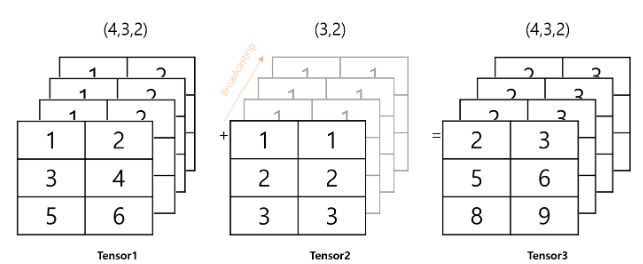  

코드를 통해 확인해보자  
먼저 3*4 행렬이다. shape 을 사용하면 (3,4)인 것을 알 수 있다.

In [18]:
tensor_rank2=[[1,2,3,4],[1,2,3,4],[1,2,3,4]]
np.array(tensor_rank2).shape

(3, 4)

In [20]:
tensor_rank3=[
    [[1,2,3,4],[1,2,3,4],[1,2,3,4]],
    [[1,2,3,4],[1,2,3,4],[1,2,3,4]],
    [[1,2,3,4],[1,2,3,4],[1,2,3,4]],
    [[1,2,3,4],[1,2,3,4],[1,2,3,4]]
]
np.array(tensor_rank3).shape

(4, 3, 4)

랭크가 오르니, (4,3,4)로 바뀐 것을 알 수 있다. 행렬의 차원이였던 (3,4)가 뒤로 밀린 것을 확인할 수 있다.  
shape 이외에도 배열의 구조를 알 수 있는 함수는 **ndim**과 **size**가 있다.  
| 함수 | 설명 |
|-- | --|
| ndim | rank를 의미 |
| size | 넘파이 배열에 있는 모든 요소(element)의 개수 |

In [24]:
print(np.array(tensor_rank2).ndim) ##rank 2 ->matrix
print(np.array(tensor_rank2).size) ## 3*4=12

print(np.array(tensor_rank3).ndim) ##rank 3 ->3rd order tensor
print(np.array(tensor_rank3).size) ## 4*3*4=48

2
12
3
48


#### 3-2. dtype
넘파이 배열의 데이터 타입은 dtype으로 지정이 가능하다. 기본적으로 dtype을 지정해주기 위해선 넘파이 배열을 생성할 때 매개변수 dtype을 사용한다. 데이터 타입별로 변수가 사용하는 메모리 크기의 차이가 있다. 이를 확인하기 위한 요소(property)로 매개변수 itemsize를 사용할 수 있다. itemsize는 넘파이 배열에서 사용하는 각 요소가 차지하는 바이트를 의미한다.

In [29]:
import sys

array1=np.array([[1,2,3.5],[4,5,6.5]],dtype=np.float64)
array2=np.array([[1,2,3.5],[4,5,6.5]],dtype=np.float32)

print(array1.itemsize)
print(array2.itemsize)

8
4


---

### 4. 배열의 구조 다루기
배열의 구조는 필요에 따라 변경할 필요가 있는데, 이를 위해 사용할 수 있는 함수가 **reshape**이다. reshape함수는 다음 코드와 같이 사용할 수 있다.

In [31]:
x=np.array([[1,2,3,4],[5,6,7,8]])
print(x.shape)

(2, 4)


In [38]:
print(x.reshape(-1,))

[0 1 2 3 4 5 6 7]


이 코드에서 2*4 행렬의 넘파이 배열을 8개의 요소가 들어있는 벡터 형태로 변경을 했다. reshape을 이용하면 배열의 구조를 변경할수 있고, 랭크도 조절할 수 있다.  
reshape으로 배열의 구조를 변경할 때에는 반드시 전체 요소의 개수는 통일해야 한다. 만약 데이터 요소의 개수가 맞지 않다면 다음 코드와 같이 에러가 발생한다.


In [34]:
x=np.array(range(8))
print(x)

[0 1 2 3 4 5 6 7]


In [37]:
print(x.reshape(2,2))
#8개의 데이터 요소를 2*2 행렬로 만들 수 없기에 다음 에러가 발생했다.

ValueError: cannot reshape array of size 8 into shape (2,2)

reshape 함수 사용법 중 기억할 점은 **-1**을 사용하는 것이다 -1은 전체 요소의 개수는 고정시키고 1개를 제외한 나머지 차원의 크기를 지정했을 때 전체 요소의 개수를 고려하여 마지막 차원이 자동으로 지정되는 기법이다. 

In [40]:
x=np.array(range(8)).reshape(4,2)
print(x)

[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [44]:
print(x.reshape(2,-1))    ## 기본적으로 8개의 요소에서 행에 해당하는 값이 2인데, 열에 -1을 매개변수로 입력하여 자동으로 나머지 값이 4로 지정됨
print(x.reshape(2,2,-1))  ## 랭크가 3인 3차원 텐서로 변경되며 자동으로 2*2*2의 텐서 생성

[[0 1 2 3]
 [4 5 6 7]]
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


reshape 이외에도 사용할 수 있는 함수 중 하나는 **flatten**이다. flatten 함수는 데이터 그대로 1차원으로 변경해주는 함수이다.

In [45]:
x=np.array(range(8)).reshape(2,2,2)
print(x)

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


In [46]:
print(x.flatten())

[0 1 2 3 4 5 6 7]


위의 코드를 보면 2*2*2의 3차원 텐서를 데이터 변경 없이 배열의 구조만 1차원 벡터로 변경한 것을 확인할 수 있다.

---

### 5. 인덱싱과 슬라이싱
넘파이 배열은 파이썬 리스트의 요소를 다루기 위한 기법 중 인덱싱과 슬라이싱을 사용할 수 있는데, 기존 리스트와는 일부 다른 표기법을 제공한다

#### 5-1. 인덱싱
인덱싱이란 리스트에 있는 값에 접근하기 위해 이 값의 상대적인 주소(offset)를 사용하는 것이다.

In [51]:
x=np.array([[1,2,3],[4.5,5,6]],int)
print(x)

[[1 2 3]
 [4 5 6]]


In [53]:
print(x[0][0])
print(x[0,2])
x[0,1]=100
print(x)

1
3
[[  1 100   3]
 [  4   5   6]]


위의 코드를 보면 넘파이 배열과 리스트의 가장 큰 차이는 인덱싱 표현에 있어 **쉼표**를 지원한다는 것이다. 행렬 [[1,2,3].[4,5,6]]에서 일반적으로 표현하는 방법은 [행][열] 형태로 나타낸다. 하지만 넘파이에선 [행,열] 형태로도 값을 표현할 수 있다. 만약 3차원 텐서 이상의 값들을 다루게 된다면 shape에서 출력되는 랭크의 순서대로 값의 인덱싱에 접근할 수 있다.

In [55]:
x=np.array(range(12)).reshape(2,2,-1)
print(x)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


In [59]:
print(x[0,0,2])
print(x[1][1][0])

2
9


#### 5-2. 슬라이싱
슬라이싱이란 리스트의 인덱스를 사용하여 전체 리스트에서 일부를 잘라내어 반환하는 것이다. 넘파이에서는 파이썬에서 사용하는 리스트를 그대로 사용하면서 리스트와는 달리 행과 열을 나눠서 슬라이싱을 할 수 있다는 장점이 있으므로 리스트보다 훨씬 더 손쉽게 데이터를 뽑을 수 있다.

In [76]:
x=np.array(range(1,11),int).reshape(2,5)
print(x)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [74]:
print(x[:,2:])   ##전체 행의 2열 이상
print(x[0,3:5])  ##0행의 3~4열
print(x[1,1:3])  ##1행의 1~2열
print(x[1:3])    ##1행~2행의 전체-> 행의 개수가 2개이므로 이를 넘어가는 인덱스는 무시

[[ 3  4  5]
 [ 8  9 10]]
[4 5]
[7 8]
[[ 6  7  8  9 10]]


In [77]:
x=np.array(range(12)).reshape(2,2,-1)
print(x)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


리스트와 마찬가지로 넘파이에서는 증가값(step)을 지원한다. 증가값은 리스트에서 데이터의 요소를 호출할 때 데이터를 건너뛰면서 반환하는 기법을 의미한다. 기본적으로 리스트의 표현볍과 동일하게  
**[시작인덱스:마지막인덱스:증가값]**의 형태로 사용하고 각 랭크에 있는 요소별로 모두 적용할 수 있기 때문에 리스트와는 달리 바둑판과 같은 구조로 데이터를 추출할 수 있다.

In [79]:
x=np.array(range(15),int).reshape(3,-1)
print(x)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [81]:
print(x[:,::2])   ##전체 행 데이터와 전체 열 데이터에서 2씩 증가값을 주어 추출
print(x[::2,::3]) ##행은 2칸씩, 열은 3칸씩 이동하여 값을 추출

[[ 0  2  4]
 [ 5  7  9]
 [10 12 14]]


---

### 6. 배열 함수 생성
앞에서 넘파이 배열을 만들기 위해 리스트를 변환하였다. 그러나 넘파이는 자체적으로 다양한 배열 생성 함수를 제공하고 있다. 필요에 따라 적절히 활용하면 넘파이 사용이 수월해진다.

#### 6.1 arange
**arange** 함수는 range 함수와 같이 차례대로 값을 생성해준다. range와 마찬가지로 (시작값,마지막값,증가값)으로 구성되어 있는데 가장 큰 차이는 증가값에 실수형(float)이 입력되어도 값을 생성할 수 있다는 점이다.

In [83]:
print(np.arange(10))
print(np.arange(-5,5))
print(np.arange(0,5,0.5))

[0 1 2 3 4 5 6 7 8 9]
[-5 -4 -3 -2 -1  0  1  2  3  4]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


#### 6.2 ones, zeros, empty
**ones** 함수는 1로만 구성된 넘파이 배열을 만든다.  
**zeros** 함수는 0으로만 구성된 넘파이 배열을 만든다.  
**empty** 함수의 경우는 값을 채우는 것이 아니라 활용 가능한 메모리 공간을 확보하여 반환한다. 따라서 해당 메모리 공간에 값이 남았을 경우 그 값을 함께 반환한다.  
3개의 함수 모두 생성 시점에서 dtype을 지정해주면 해당 데이터 타입으로 배열이 생성된다.

In [88]:
print(np.ones(shape=(3,2),dtype=np.int8))
print(np.zeros(shape=(2,2),dtype=np.float32))
print(np.empty(shape=(2,4),dtype=np.float32))

[[1 1]
 [1 1]
 [1 1]]
[[0. 0.]
 [0. 0.]]
[[0.e+00 1.e-45 3.e-45 4.e-45]
 [6.e-45 7.e-45 8.e-45 1.e-44]]


#### 6.3 ones_like, zeros_like, empty_like
해당 함수들은 기존 넘파이 배열과 같은 크기로 만들어 내용을 0 또는 1로 채우거나, 빈 상태로 만들어주는 함수이다.

In [89]:
x=np.arange(12).reshape(3,4)
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [91]:
print(np.ones_like(x))
print(np.zeros_like(x))


[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


#### 6.4 identity, eye, diag
선형대수학에서 사용하는 다양한 생성 함수도 사용할 수 있다.  
**identity**함수는 단위 행렬을 생성할 수 있다.  
**eye**함수는 동일하게 1을 생성하는 함수인데, 시작점과 행렬의 크기를 지정할 수 있다.  
**diag**함수는 행렬의 대각 원소(diagonal_element)를 추출하는 함수이다.  

In [93]:
print(np.identity(n=4,dtype=int))

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [95]:
print(np.eye(N=3,M=5))
print(np.eye(N=3,M=5,k=2))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [96]:
matrix=np.arange(9).reshape(3,3)
print(matrix)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [100]:
print(np.diag(matrix))
print(np.diag(matrix,k=2)) ##시작점을 지정할수도 있다.

[0 4 8]
[2]


---

### 7. 통계 분석 함수
넘파이에서도 R처럼 랜덤하게 특정 분포에서 데이터를 샘플링이 가능하면 R보다 기본적으로 더 많은 분포에 대한 샘플링을 제공한다. 
np.random.분포(dist_parameter(s), n)을 통해 사용가능하다. 안타깝지만, R처럼 밀도나, 확률을 구하는 것은 불가하다. 밀도와 확률을 구하려면 scipy 라이브러리를 사용해야한다.

In [101]:
##uniform dist
print(np.random.uniform(0,5,10))

[4.34043849 2.71057587 0.61157364 2.29151161 2.08900209 1.48815553
 4.32554891 3.16464028 0.0718725  4.37997484]


In [102]:
##gaussian dist
print(np.random.normal(0,2,10))

[-1.01405371  0.48028028 -2.96954917  4.32410088  1.93991929  0.53905088
  2.42811423  1.23593783  0.07728345 -1.1134113 ]


In [104]:
##poisson dist
print(np.random.poisson(10,10))

[13 10 11 12 13 11 10  6 16  9]
